In [3]:
import proplot as plot
import numpy as np

## Niu2007 (LMDZOR-STD-REF)

[Niu and Yang (2007)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2007JD008674)

$$
F=\tanh \left(\frac{d}{2.5 z_{0 g}\left(\rho_{\text {snow}} / \rho_{\text {new}}\right)^{m}}\right)
$$

where d is grid cell average snow depth, z0g = 0.01 is called the ground roughness length, rsnow is the snow density, rnew = 100 kg/m3 is the density of new snow, and m is an empirical constant. The value of m given by NY07 is 1.6, while the value of m used in CLM4 is 1.0.

In [7]:
def F_NY07(d, z0, rho_snow, rho_new, m):
     return np.tanh( d / ( 2.5 * z0 * (rho_snow/rho_new)**m ) )*100

In [8]:
d = plot.arange(0,1,0.01) # grid cell average snow depth [m]
z0 = 0.01 # ground roughness length [m]
rho_snow = 300 # snow density [kg/m3]
rho_new = 100 # density of new snow [kg/m3]
m = 1.6 # The value of m given by NY07 is 1.6, while the value of m used in CLM4 is 1.0

In [9]:
y = F_NY07(d, z0, rho_snow, rho_new, m)
x = d

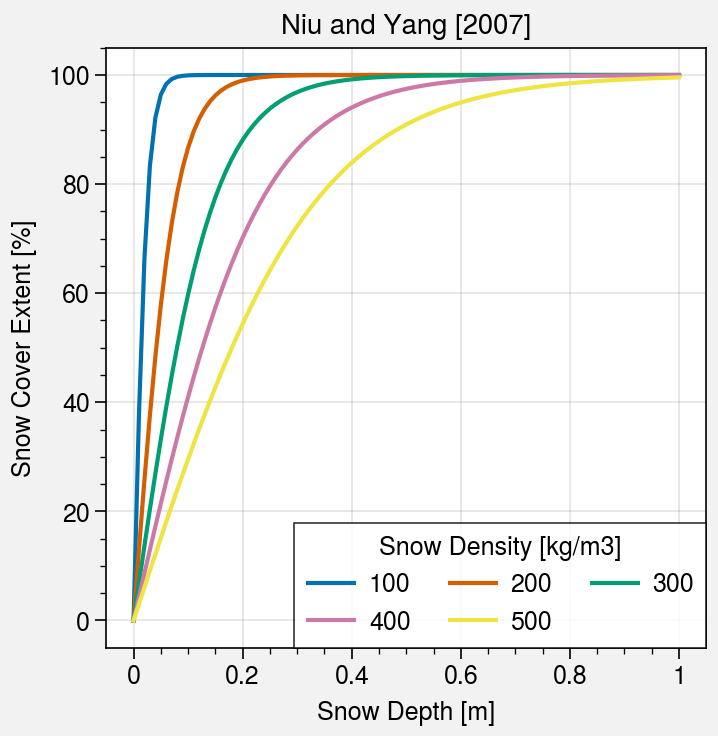

In [10]:
rho_snow_list = plot.arange(100,500,100)

fig, axs = plot.subplots(axwidth=3)

axs.format(
    xlabel='Snow Depth [m]',
    ylabel='Snow Cover Extent [%]',
    title='Niu and Yang [2007]'
)

hs = []
for rho_snow in rho_snow_list:
    y = F_NY07(d, z0, rho_snow, rho_new, m)
    h = axs[0].plot(d, y, label=rho_snow)
    hs.append(h)

axs.legend(hs, label='Snow Density [kg/m3]')

## Orchidée actual version

https://orchidas.lsce.ipsl.fr/dev/albedo/

The fraction of snow on vegetated surfaces is calculated in the explicit snow scheme from the simulated snow depth (dsnow) and snow density (ρsnow) as:

$$
F=\tanh \frac{ 50 \times d_{snow} }{ 0.025 \times \rho_{snow} }
$$

Pour le moment il n'y a pas de nobio dans mes simus, donc je focus seulement sur cette formule.

In [17]:
title = 'Orchidée fraction of snow on vegetated surfaces'

def frac_snow_veg(snow_depth, rho_snow):
     return np.tanh( 50 * snow_depth / ( 0.025 * rho_snow ) ) * 100

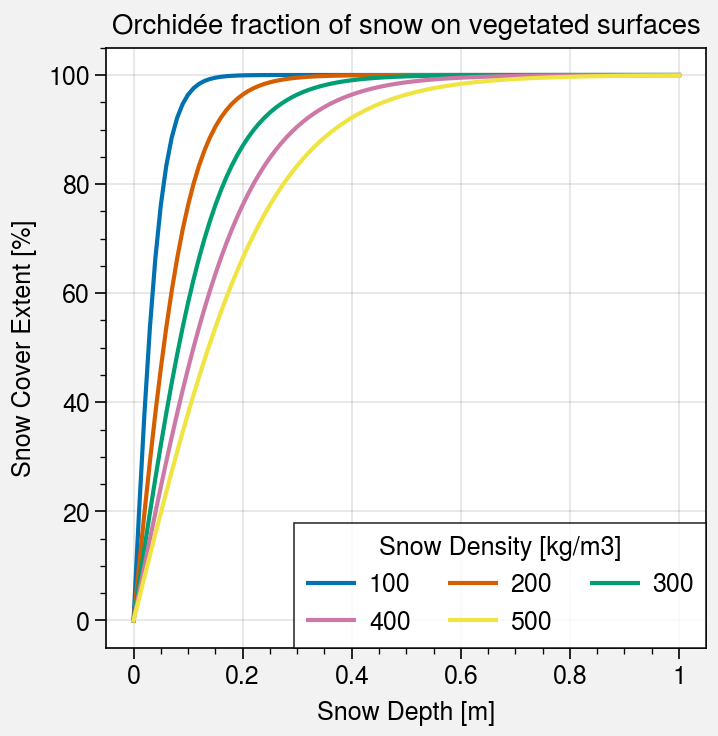

In [18]:
snow_depth = plot.arange(0,1,0.01) # grid cell average snow depth [m]
rho_snow_list = plot.arange(100,500,100) # snow density [kg/m3]

fig, axs = plot.subplots(axwidth=3)

hs = []
x = snow_depth

for rho_snow in rho_snow_list:
    y = frac_snow_veg(snow_depth, rho_snow)
    
    h = axs[0].plot(x, y, label=rho_snow)
    hs.append(h)

axs.legend(hs, label='Snow Density [kg/m3]')

axs.format(
    xlabel='Snow Depth [m]',
    ylabel='Snow Cover Extent [%]',
    title=title
)

## Comparison

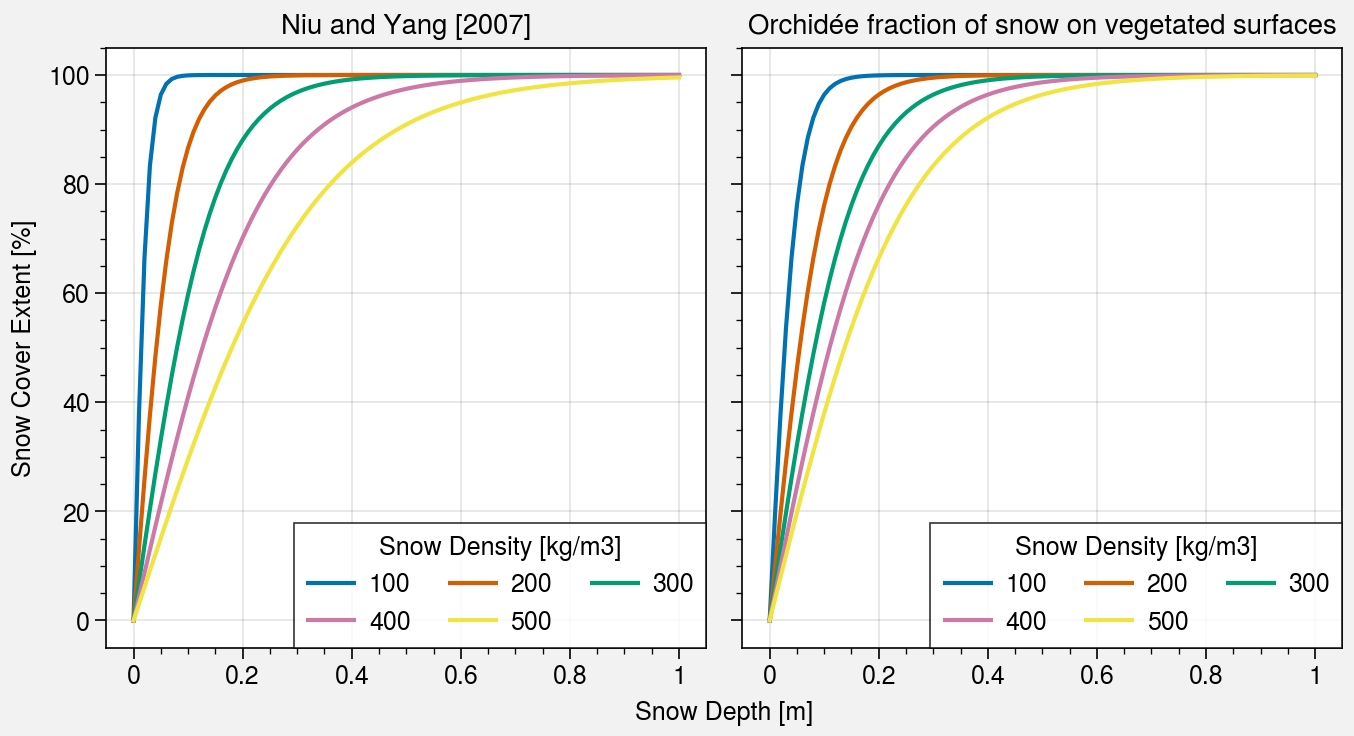

In [21]:
snow_depth = plot.arange(0,1,0.01) # grid cell average snow depth [m]
rho_snow_list = plot.arange(100,500,100) # snow density [kg/m3]

fig, axs = plot.subplots(axwidth=3, ncols=2)

hs = []
x = snow_depth

for rho_snow in rho_snow_list:
    y = F_NY07(d, z0, rho_snow, rho_new, m)
    h = axs[0].plot(x, y, label=rho_snow)
    
    y = frac_snow_veg(snow_depth, rho_snow)
    h = axs[1].plot(x, y, label=rho_snow)
    
    hs.append(h)

axs.legend(hs, label='Snow Density [kg/m3]')

axs.format(
    xlabel='Snow Depth [m]',
    ylabel='Snow Cover Extent [%]',
)

axs[0].format(title='Niu and Yang [2007]')
axs[1].format(title=title)

## Older version from [Tao Wang et al. (2013)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/jgrd.50395)? Not Niu?

$$
SCF = \frac{ SWE }{ SWE + 10 } = \frac{ rho_{snow} \times d_{snow} }{ rho_{snow} \times d_{snow} + 10 }
$$

L'impact de la densité ne va pas dans le bon sens ?

In [25]:
title = 'Orchidée Wang et al. (2013)'

def frac_snow_old(snow_depth, rho_snow):
     return snow_depth*rho_snow / (snow_depth*rho_snow + 10) * 100

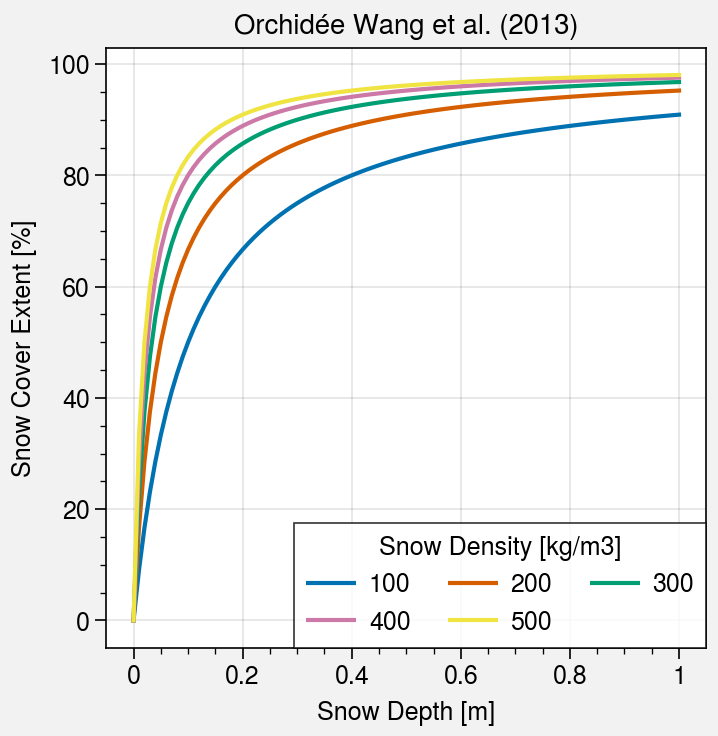

In [26]:
snow_depth = plot.arange(0,1,0.01) # grid cell average snow depth [m]
rho_snow_list = plot.arange(100,500,100) # snow density [kg/m3]

fig, axs = plot.subplots(axwidth=3)

hs = []
x = snow_depth

for rho_snow in rho_snow_list:
    y = frac_snow_old(snow_depth, rho_snow)
    
    h = axs[0].plot(x, y, label=rho_snow)
    hs.append(h)

axs.legend(hs, label='Snow Density [kg/m3]')

axs.format(
    xlabel='Snow Depth [m]',
    ylabel='Snow Cover Extent [%]',
    title=title
)